## 範例重點

學習如何在 keras 中加入 BatchNorm

知道有無 BN 對訓練的影響

比較 BN 在不同 batch size 下的效果

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0722 21:19:02.846702 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 21:19:02.888132 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 21:19:02.907536 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 21:19:03.108869 4503725504 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.p

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

W0722 21:19:04.577383 4503725504 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 339us/step - loss: 2.2212 - acc: 0.2706 - val_loss: 2.1057 - val_acc: 0.3144
Epoch 2/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.7422 - acc: 0.3926 - val_loss: 1.8101 - val_acc: 0.3672
Epoch 3/50
50000/50000 [==============================] - 13s 252us/step - loss: 1.6077 - acc: 0.4369 - val_loss: 1.6732 - val_acc: 0.4114
Epoch 4/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.5323 - acc: 0.4646 - val_loss: 1.6169 - val_acc: 0.4291
Epoch 5/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.4755 - acc: 0.4821 - val_loss: 1.5950 - val_acc: 0.4308
Epoch 6/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.4305 - acc: 0.4987 - val_loss: 1.5599 - val_acc: 0.4467
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.3912 - acc: 0.5150 - val_loss: 1.

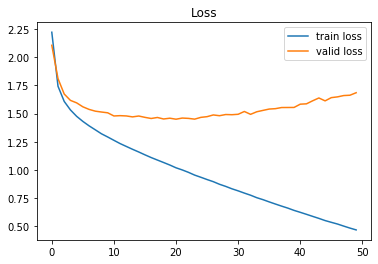

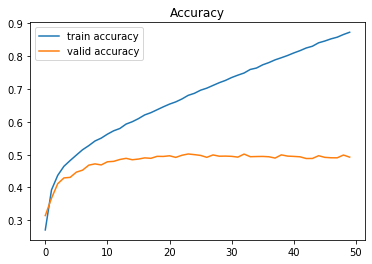

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work

1.試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

2.請嘗試將 BN 放在 Activation 之前，並比較訓練結果

3.請於 BN 放在 Input Layer 後，並比較結果

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 185s 4ms/step - loss: 2.2862 - acc: 0.1269 - val_loss: 2.3679 - val_acc: 0.1504
Epoch 50/50
50000/50000 [==============================] - 185s 4ms/step - loss: 2.2865 - acc: 0.1264 - val_loss: 2.3842 - val_acc: 0.1390
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
________

50000/50000 [==============================] - 25s 505us/step - loss: 1.0983 - acc: 0.6109 - val_loss: 1.3285 - val_acc: 0.5349
Epoch 48/50
50000/50000 [==============================] - 25s 504us/step - loss: 1.0912 - acc: 0.6117 - val_loss: 1.4259 - val_acc: 0.5085
Epoch 49/50
50000/50000 [==============================] - 25s 506us/step - loss: 1.1146 - acc: 0.6038 - val_loss: 1.4050 - val_acc: 0.5121
Epoch 50/50
50000/50000 [==============================] - 25s 503us/step - loss: 1.1009 - acc: 0.6089 - val_loss: 1.3394 - val_acc: 0.5367
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2

50000/50000 [==============================] - 20s 401us/step - loss: 0.8281 - acc: 0.7035 - val_loss: 1.6067 - val_acc: 0.5005
Epoch 46/50
50000/50000 [==============================] - 20s 402us/step - loss: 0.8166 - acc: 0.7072 - val_loss: 1.5521 - val_acc: 0.5041
Epoch 47/50
50000/50000 [==============================] - 20s 405us/step - loss: 0.8166 - acc: 0.7087 - val_loss: 1.5032 - val_acc: 0.5255
Epoch 48/50
50000/50000 [==============================] - 20s 400us/step - loss: 0.8027 - acc: 0.7134 - val_loss: 1.5220 - val_acc: 0.5208
Epoch 49/50
50000/50000 [==============================] - 20s 399us/step - loss: 0.7933 - acc: 0.7154 - val_loss: 1.6188 - val_acc: 0.5025
Epoch 50/50
50000/50000 [==============================] - 20s 401us/step - loss: 0.7831 - acc: 0.7209 - val_loss: 1.5482 - val_acc: 0.5151
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072

50000/50000 [==============================] - 9s 176us/step - loss: 0.3269 - acc: 0.8880 - val_loss: 2.3226 - val_acc: 0.4732
Epoch 44/50
50000/50000 [==============================] - 9s 177us/step - loss: 0.3227 - acc: 0.8890 - val_loss: 2.4768 - val_acc: 0.4613
Epoch 45/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.3180 - acc: 0.8907 - val_loss: 2.3804 - val_acc: 0.4593
Epoch 46/50
50000/50000 [==============================] - 9s 174us/step - loss: 0.2983 - acc: 0.8978 - val_loss: 2.3204 - val_acc: 0.4685
Epoch 47/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.2761 - acc: 0.9079 - val_loss: 2.3528 - val_acc: 0.4742
Epoch 48/50
50000/50000 [==============================] - 9s 173us/step - loss: 0.2775 - acc: 0.9050 - val_loss: 2.5112 - val_acc: 0.4615
Epoch 49/50
50000/50000 [==============================] - 9s 172us/step - loss: 0.2710 - acc: 0.9074 - val_loss: 2.5614 - val_acc: 0.4568
Epoch 50/50
50000/50000 [==============

50000/50000 [==============================] - 6s 118us/step - loss: 0.2776 - acc: 0.9167 - val_loss: 2.2729 - val_acc: 0.4679
Epoch 42/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.2590 - acc: 0.9237 - val_loss: 2.1621 - val_acc: 0.4831
Epoch 43/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2430 - acc: 0.9302 - val_loss: 2.2768 - val_acc: 0.4680
Epoch 44/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.2305 - acc: 0.9334 - val_loss: 2.4635 - val_acc: 0.4527
Epoch 45/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2216 - acc: 0.9371 - val_loss: 2.3216 - val_acc: 0.4775
Epoch 46/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2059 - acc: 0.9428 - val_loss: 2.3907 - val_acc: 0.4630
Epoch 47/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.2037 - acc: 0.9413 - val_loss: 2.4851 - val_acc: 0.4533
Epoch 48/50
50000/50000 [==============

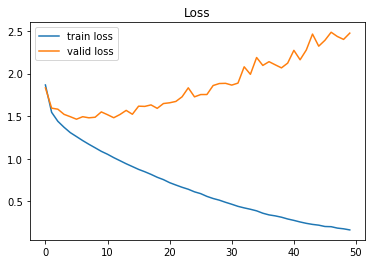

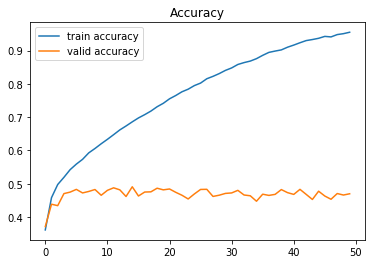

In [14]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""




train, test = keras.datasets.cifar10.load_data()






## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    






x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)






from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model






## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95






# Define results
results = {}
for batchSize in BATCH_SIZE :
    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              
              # different batch_size
              batch_size=batchSize, 
              
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    name_tag = 'batchSize : %.2f' % batchSize
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

    
    
    
    
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()


## 觀察現象 : BATCH_SIZE = [2, 16, 32, 128, 256]

when batch_size == 2, low train acc(0.1264), low validation acc(0.1390), there's no overfitting

when batch_size == 16, a better train acc(0.6089), better validation acc(0.5367), overfitting exists

when batch_size == 32, 128, 256, high train acc(0.9, 0.95), poor validation acc(0.45), overfitting 

## 2.請嘗試將 BN 放在 Activation 之前，並比較訓練結果

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

50000/50000 [==============================] - 7s 140us/step - loss: 0.1054 - acc: 0.9884 - val_loss: 2.1460 - val_acc: 0.4966
Epoch 50/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.0964 - acc: 0.9907 - val_loss: 2.1707 - val_acc: 0.4914


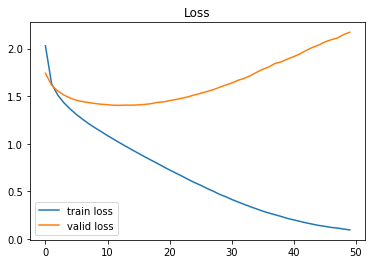

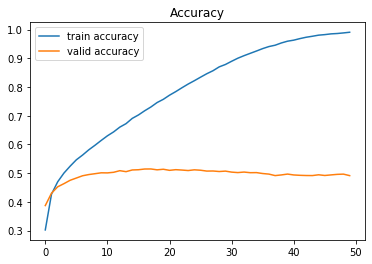

In [15]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""




train, test = keras.datasets.cifar10.load_data()






## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    






x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)






from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            # 2. 把 BatchNormalization 放在 activation 前
            x = BatchNormalization()(input_layer)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            # 2. 把 BatchNormalization 放在 activation 前
            x = BatchNormalization()(x)
            
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model






## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95





model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]




# # Define results
# results = {}
# for batchSize in BATCH_SIZE :
    
#     model = build_mlp(input_shape=x_train.shape[1:])
#     model.summary()

#     optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
#     model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

#     model.fit(x_train, y_train, 
#               epochs=EPOCHS, 
              
#               # different batch_size
#               batch_size=batchSize, 
              
#               validation_data=(x_test, y_test), 
#               shuffle=True)

#     # Collect results
#     train_loss = model.history.history["loss"]
#     valid_loss = model.history.history["val_loss"]
#     train_acc = model.history.history["acc"]
#     valid_acc = model.history.history["val_acc"]
    
#     name_tag = 'batchSize : %.2f' % batchSize
#     results[name_tag] = {'train-loss': train_loss,
#                          'valid-loss': valid_loss,
#                          'train-acc' : train_acc,
#                          'valid-acc' : valid_acc}

    
    
    
    
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 3.請於 BN 放在 Input Layer 後，並比較結果

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,751,178
Trainable params: 1,745,034
Non-trainable params: 6,144
______________________________________________________________

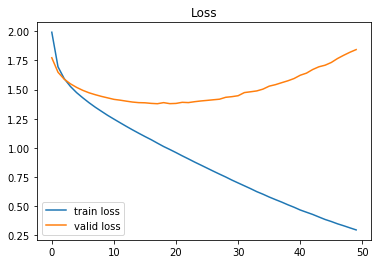

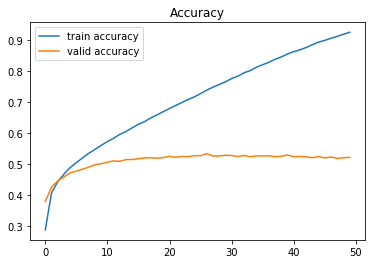

In [16]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""




train, test = keras.datasets.cifar10.load_data()






## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    






x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)






from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    # 3. BN 放在 Input Layer 後
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model






## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = 0.95





model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]




# # Define results
# results = {}
# for batchSize in BATCH_SIZE :
    
#     model = build_mlp(input_shape=x_train.shape[1:])
#     model.summary()

#     optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
#     model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

#     model.fit(x_train, y_train, 
#               epochs=EPOCHS, 
              
#               # different batch_size
#               batch_size=batchSize, 
              
#               validation_data=(x_test, y_test), 
#               shuffle=True)

#     # Collect results
#     train_loss = model.history.history["loss"]
#     valid_loss = model.history.history["val_loss"]
#     train_acc = model.history.history["acc"]
#     valid_acc = model.history.history["val_acc"]
    
#     name_tag = 'batchSize : %.2f' % batchSize
#     results[name_tag] = {'train-loss': train_loss,
#                          'valid-loss': valid_loss,
#                          'train-acc' : train_acc,
#                          'valid-acc' : valid_acc}

    
    
    
    
    
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()